# Modelling Pulses Using Functions And Expressions

Assume we want to model a pulse that represents a damped sine function. While we could, in theory, do this using `TablePulseTemplate`s by piecewise linear approximation (cf. [Modelling a Simple TablePulseTemplate](00SimpleTablePulse.ipynb)), this would be a tedious endeavor. A much simpler approach presents itself in the form of the `FunctionPulseTemplate` class of the qctoolkit. Like the `TablePulseTemplate`, a `FunctionPulseTemplate` represents an atomic pulse which will be converted into a waveform for execution. The difference between both is that `FunctionPulseTemplate` accepts a mathematical expression which is parsed and evaluated using `py_expression_eval` to sample the waveform instead of the linear interpolation between specified supporting points as it is done in `TablePulseTemplate`.

To define the sine function pulse template, we can thus do the following:

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


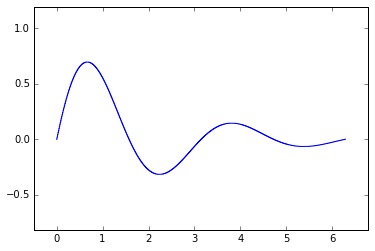

In [2]:
from qctoolkit.pulses import FunctionPulseTemplate

template = FunctionPulseTemplate('exp(-t/2)*sin(2*t)', '2*3.1415')

%matplotlib inline
from qctoolkit.pulses import plot

plot(template, sample_rate=100)

The first argument to `FunctionPulseTemplate`'s constructor is the string representation of the formula that the pulse represents. The second argument is used to compute the length of the pulse. In this case, this is simply a constant expression. Refer to [py-expression-eval's documentation](https://github.com/AxiaCore/py-expression-eval#available-operators-constants-and-functions) to read about the usable operators and functions in the expressions.

The `t` is reserved as the free variable of the time domain in the first argument and must be present. Other variables can be used at will and corresponding values have to be passed in as a parameter when instantiating the `FunctionPulseTemplate`:

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


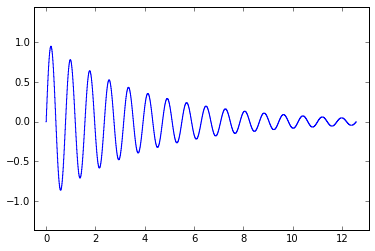

In [9]:
param_template = FunctionPulseTemplate('exp(-t/lambda)*sin(phi*t)', 'duration')

%matplotlib inline
from qctoolkit.pulses import plot

plot(param_template, {'lambda': 4, 'phi': 8, 'duration': 4*3.1415}, sample_rate=100)